In [447]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns


In [448]:
path = kagglehub.dataset_download("seymasa/rice-dataset-gonenjasmine")
df = pd.read_csv(path + "/Rice-Gonen andJasmine.csv")
df


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,jasmine
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,jasmine
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,jasmine
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,jasmine
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,jasmine
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,Gonen
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,Gonen
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,Gonen
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,Gonen


In [449]:
df.describe()


,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
count,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000,18185.000000
mean,9093.000000,7036.492989,151.680754,59.807851,0.915406,7225.817872,94.132952,0.616653,351.606949,0.707998,2.599081
std,5249.701658,1467.197150,12.376402,10.061653,0.030575,1502.006571,9.906250,0.104389,29.500620,0.067310,0.434836
min,1.000000,2522.000000,74.133114,34.409894,0.676647,2579.000000,56.666658,0.383239,197.015000,0.174590,1.358128
25%,4547.000000,5962.000000,145.675910,51.393151,0.891617,6125.000000,87.126656,0.538530,333.990000,0.650962,2.208527
50%,9093.000000,6660.000000,153.883750,55.724288,0.923259,6843.000000,92.085696,0.601194,353.088000,0.701941,2.602966
75%,13639.000000,8423.000000,160.056214,70.156593,0.941372,8645.000000,103.559146,0.695664,373.003000,0.769280,2.964101
max,18185.000000,10210.000000,183.211434,82.550762,0.966774,11008.000000,114.016559,0.886573,508.511000,0.904748,3.911845


In [450]:
df = df[df["Class"] == "jasmine"]


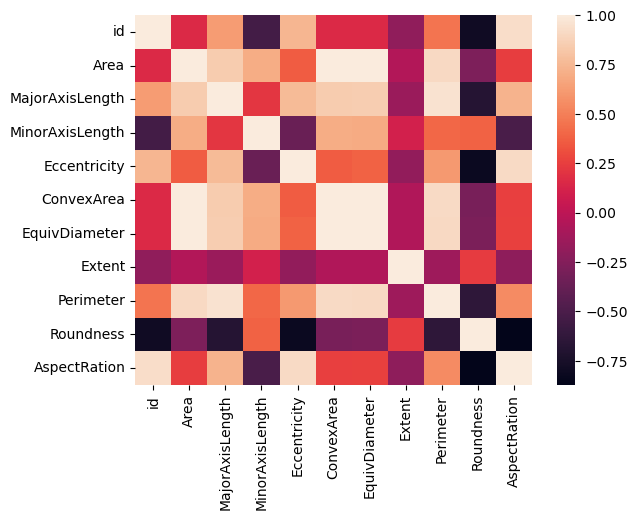

In [451]:
sns.heatmap(df.drop(["Class"], axis=1).corr())
plt.show()


In [452]:
X = df.drop(["Class", "Area"], axis=1)
y = df["Area"]

y


0        4537
1        2872
2        3048
3        3073
4        3693
         ... 
11495    5048
11496    5880
11506    6298
11509    6216
11515    4842
Name: Area, Length: 9985, dtype: int64

In [453]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_scaler = StandardScaler()
y_scaler = StandardScaler()

X = x_scaler.fit_transform(X)
y = y_scaler.fit_transform(df["Area"].to_numpy().reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.2, test_size=0.05, random_state=0
)


In [454]:
y_train


array([[ 0.82347913],
       [-1.42181904],
       [-0.05030012],
       ...,
       [-0.20618562],
       [ 0.7551083 ],
       [ 0.30522822]])

Optimal alpha: 83.93129498166364

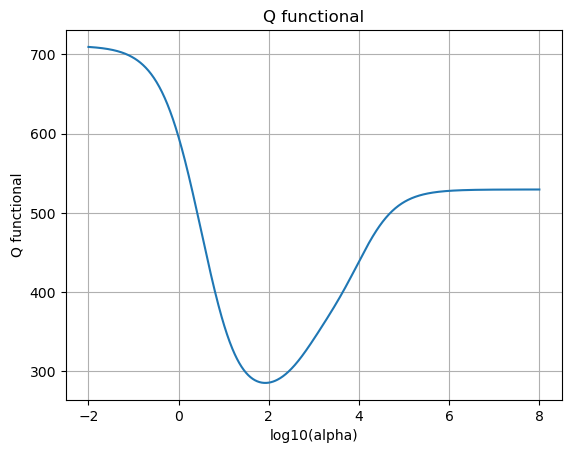

In [455]:
class RidgeRegression:
    def __init__(self):
        self.X_train = None
        self.y_train = None
        self.alpha = None

    def fit(self, X: np.ndarray, y: np.ndarray, X_ctrl: np.ndarray, y_ctrl: np.ndarray):
        self.alpha, Q, alphas = self.search_alpha(X, y, X_ctrl, y_ctrl)
        print(f"Optimal alpha: {self.alpha}")
        self.w = np.linalg.inv(X.T @ X + self.alpha * np.eye(X.shape[1])) @ X.T @ y

        plt.plot(np.log10(alphas), Q)
        plt.xlabel("log10(alpha)")
        plt.ylabel("Q functional")
        plt.title("Q functional")
        plt.grid(True)
        plt.show()

    def predict(self, X):
        return X @ self.w

    def search_alpha(
        self,
        X: np.ndarray,
        y: np.ndarray,
        X_ctrl: np.ndarray,
        y_ctrl: np.ndarray,
    ) -> float:
        U, S, V_T = np.linalg.svd(X, full_matrices=False)
        Q_functionals = np.zeros(1000)
        alphas = np.logspace(-2, 8, 1000)
        for idx, alpha in enumerate(alphas):
            Q_functional = (
                np.linalg.norm(
                    X_ctrl @ V_T @ np.diag((S) / (alpha + S**2)) @ U.T @ y - y_ctrl
                )
                ** 2
            )

            Q_functionals[idx] = Q_functional

        return alphas[np.argmin(Q_functionals)], Q_functionals, alphas


ridge_regression = RidgeRegression()
ridge_regression.fit(X_train, y_train, X_test, y_test)
optimal_alpha = ridge_regression.alpha


In [458]:
from rich import print
from sklearn.metrics import r2_score, mean_squared_error

print("CUSTOM")
print(f"MSE:    {mean_squared_error(y_test, ridge_regression.predict(X_test))}")
print(f"R2:     {r2_score(y_test, ridge_regression.predict(X_test))}")
print(f"Alpha:  {optimal_alpha}")


CUSTOM

MSE:    0.002402978591699391

R2:     0.997730717889797

Alpha:  83.93129498166364

In [457]:
from sklearn.linear_model import Ridge

sklearn_ridge = Ridge(alpha=optimal_alpha)
sklearn_ridge.fit(X_train, y_train)
print("SKLEARN")
print(f"MSE:    {mean_squared_error(y_test, sklearn_ridge.predict(X_test))}")
print(f"R2:     {r2_score(y_test, sklearn_ridge.predict(X_test))}")
print(f"Alpha:  {sklearn_ridge.alpha}")


SKLEARN

MSE:    0.0024036669178121198

R2:     0.9977300678606461

Alpha:  83.93129498166364